# Linear Regression
## Bike sharing demand assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [357]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [358]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [359]:
bike.shape

(730, 16)

In [360]:
bike.info()
# there are no null values in any columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [361]:
# dropiing casual and registered since the target variable is the column cnt. 
bike = bike.drop(columns=['instant','dteday','casual', 'registered'])
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- which predictors directly have a strong association with the outcome variable

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numerical variables

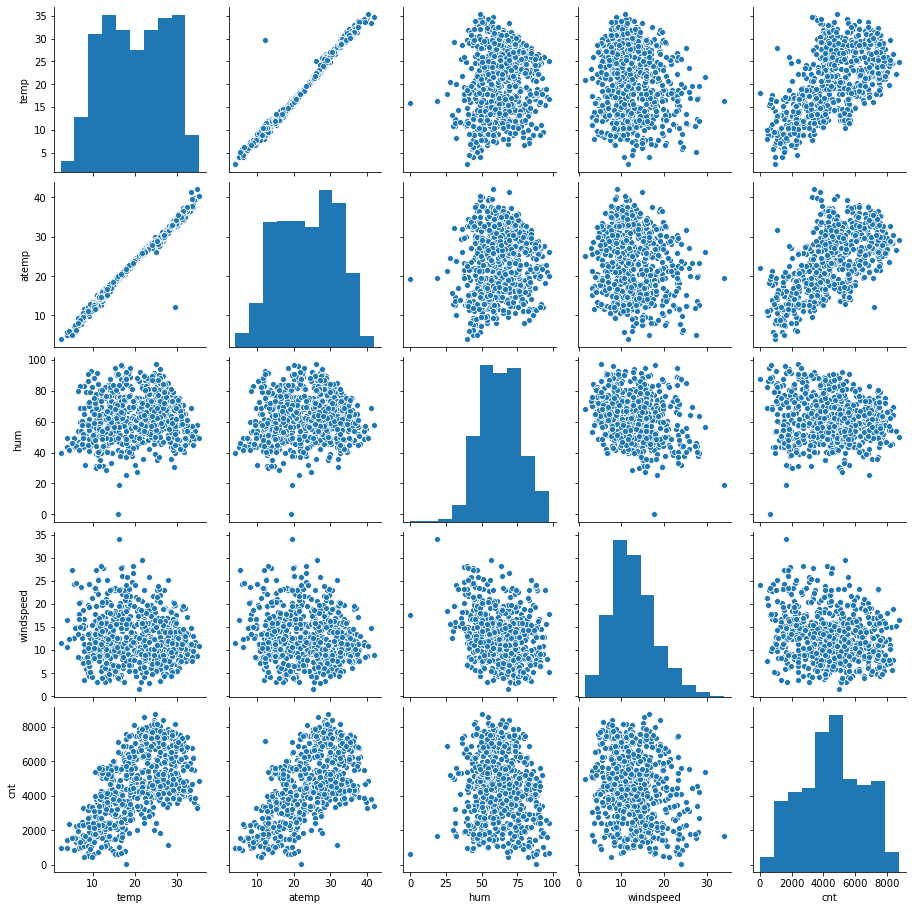

In [363]:
numerical_variables = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(numerical_variables)
plt.show()

### Visualising categorical variables

In [364]:
# mapping of variables :
weather_mapping = {'season': {1:'spring',
                              2:'summer',
                              3:'fall',
                              4:'winter'},
                   'weathersit':{1: 'clear',
                                 2:'mist_cloudy',
                                 3: 'light_snow_rain',
                                 4: 'heavy_rain_thunderstorm'},
                   'mnth':{1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',
                              7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},
                   'weekday':{0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
                   
                   }

In [365]:
# bike['weathersit'] = bike['weathersit'].replace(weather_mapping['weathersit'])
bike.replace(weather_mapping, inplace=True)

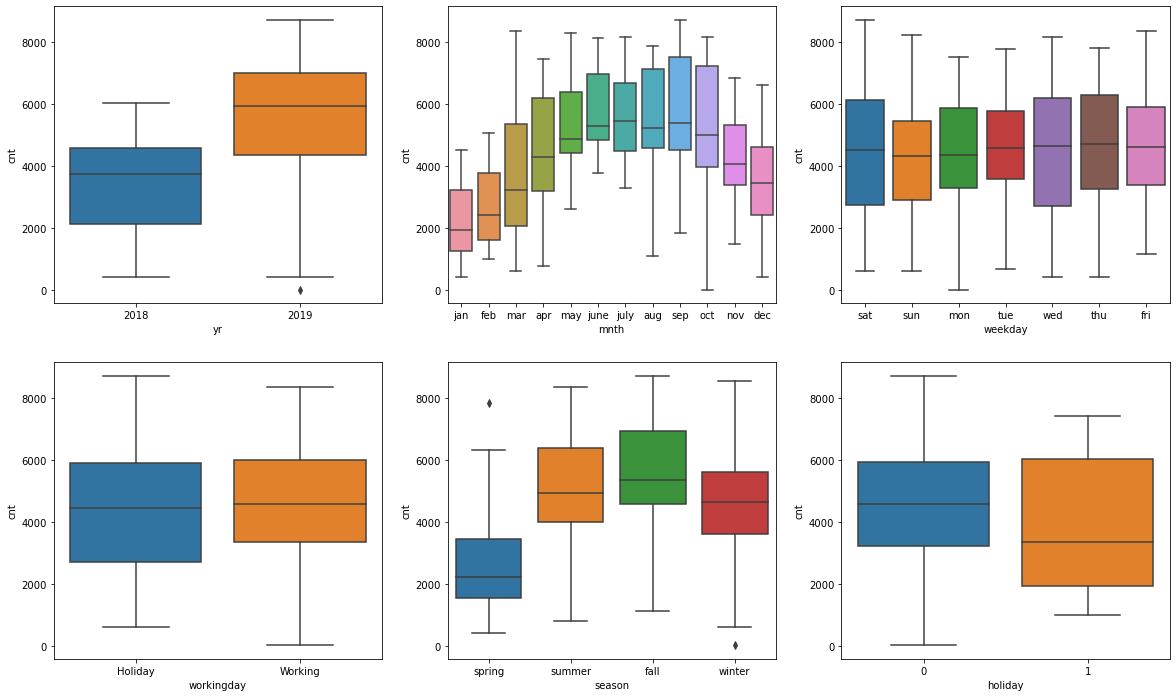

In [366]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt', data=bike_categorical)
plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=bike_categorical)
plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt', data=bike_categorical)
plt.subplot(2,3,4)
sns.boxplot(x='workingday',y='cnt', data=bike_categorical)
plt.subplot(2,3,5)
sns.boxplot(x='season',y='cnt', data=bike_categorical)
plt.subplot(2,3,6)
sns.boxplot(x='holiday',y='cnt', data=bike_categorical)

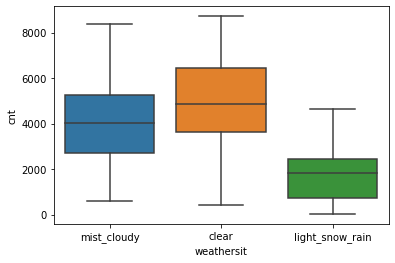

In [367]:
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

## Step 3: Data Preparation

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [368]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)

In [369]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_new = pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [370]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  aug              730 non-null    uint8  
 13  dec              730 non-null    uint8  
 14  feb              730 non-null    uint8  
 15  jan              730 non-null    uint8  
 16  july             730 non-null    uint8  
 17  june            

In [371]:
# dropping unnecessary columns as we have already created dummy out of it

bike_new.drop(['season','mnth','weekday','weathersit'], inplace=True, axis=1)

## Step 4: Splitting the Data into Training and Testing Sets

In [372]:
from sklearn.model_selection import train_test_split

# this is set so that training and testing data has same rows
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size=0.7, test_size=0.3, random_state=100)

In [373]:
df_train.shape

(510, 30)

### Rescaling the features


In [374]:
from sklearn.preprocessing import MinMaxScaler

In [375]:
scaler = MinMaxScaler()

In [376]:
# applying scalerto all variables except the 1,0 variables

num_vars =  ['temp','atemp','hum','windspeed','cnt']

In [377]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [378]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snow_rain,mist_cloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


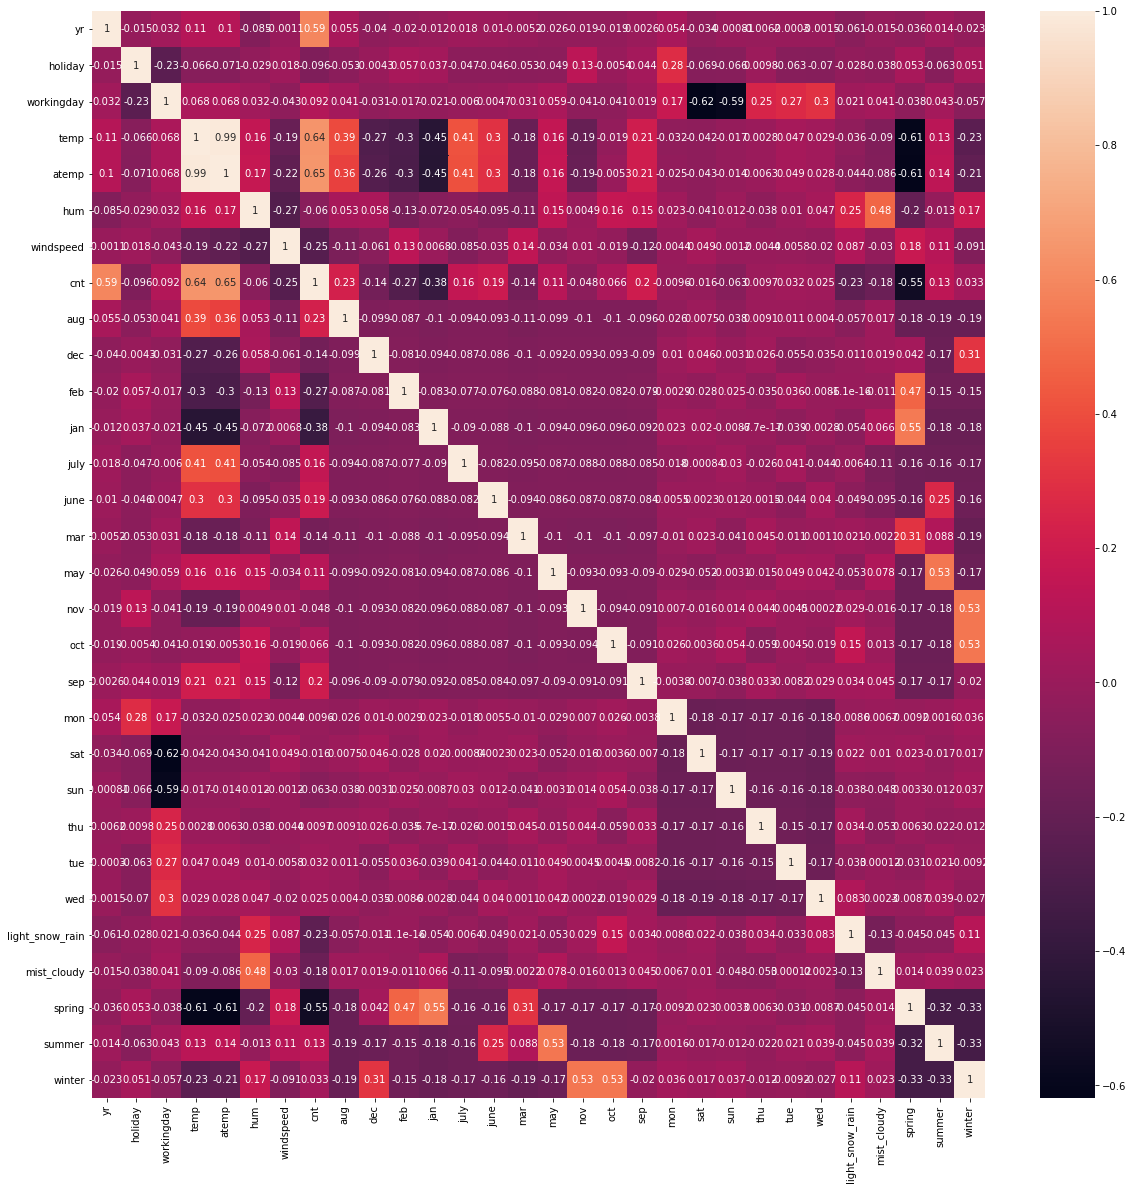

In [379]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

`temp` seems to have the most correlation with `cnt`

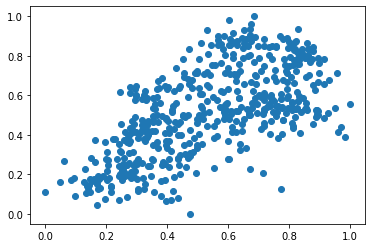

In [380]:
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [381]:
#picking temperature as the first variable and dividing dataset to x and y
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`.In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### RFE
Recursive feature elimination

In [382]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [383]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [384]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('light_snow_rain', True, 1),
 ('mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [385]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'light_snow_rain', 'mist_cloudy', 'spring',
       'summer', 'winter'],
      dtype='object')

In [386]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [387]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [388]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [389]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [390]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.31e-191
Time:                        19:54:26   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2510      0.036     

In [391]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [392]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_train_new):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
calculate_vif(X_train_new)

           Features    VIF
4               hum  29.40
3              temp  17.77
2        workingday   5.31
5         windspeed   4.73
12           spring   4.53
14           winter   3.48
13           summer   2.84
11      mist_cloudy   2.29
0                yr   2.09
9               sat   1.98
6               jan   1.67
7              july   1.59
8               sep   1.39
10  light_snow_rain   1.25
1           holiday   1.18


In [393]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_new)   

           Features   VIF
3              temp  7.07
2        workingday  5.24
4         windspeed  4.67
11           spring  3.08
12           summer  2.33
0                yr  2.08
13           winter  1.99
8               sat  1.97
5               jan  1.62
6              july  1.59
10      mist_cloudy  1.57
7               sep  1.35
1           holiday  1.17
9   light_snow_rain  1.09


In [394]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          7.33e-189
Time:                        19:54:27   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031     

In [395]:
# We can drop Holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_new)

           Features   VIF
2              temp  6.82
1        workingday  4.68
3         windspeed  4.66
10           spring  2.99
11           summer  2.31
0                yr  2.08
12           winter  1.92
7               sat  1.84
4               jan  1.62
5              july  1.59
9       mist_cloudy  1.57
6               sep  1.34
8   light_snow_rain  1.08


In [396]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          4.11e-189
Time:                        19:54:27   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1656      0.031     

In [397]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_new)

           Features   VIF
2              temp  6.73
1        workingday  4.65
3         windspeed  4.64
9            spring  2.38
10           summer  2.31
0                yr  2.07
11           winter  1.92
6               sat  1.83
4              july  1.58
8       mist_cloudy  1.56
5               sep  1.34
7   light_snow_rain  1.08


In [398]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          3.28e-189
Time:                        19:54:28   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1493      0.031     

In [399]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_new)

           Features   VIF
2              temp  5.48
1        workingday  4.65
3         windspeed  4.63
8            spring  2.30
0                yr  2.07
9            summer  1.99
5               sat  1.83
10           winter  1.77
7       mist_cloudy  1.56
4               sep  1.23
6   light_snow_rain  1.08


In [400]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          6.86e-189
Time:                        19:54:28   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1405      0.031     

In [401]:
# We can drop spring variable as it has high p-value
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_new)

          Features   VIF
2             temp  4.76
1       workingday  4.04
3        windspeed  3.43
0               yr  2.02
5              sat  1.69
8           summer  1.57
7      mist_cloudy  1.53
9           winter  1.40
4              sep  1.20
6  light_snow_rain  1.08


In [402]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.47e-188
Time:                        19:54:29   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0753      0.019     

We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 254 (which is greater than 1) and the p-value of 1.47e-188 i.e almost equals to zero, states that the overall model is significant

In [403]:
# Checking the parameters and their coefficient values
lr_6.params

const              0.075325
yr                 0.233056
workingday         0.056323
temp               0.549936
windspeed         -0.155238
sep                0.097236
sat                0.067688
light_snow_rain   -0.288021
mist_cloudy       -0.081347
summer             0.087429
winter             0.131826
dtype: float64

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed, plot the histogram of the error terms 

In [404]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

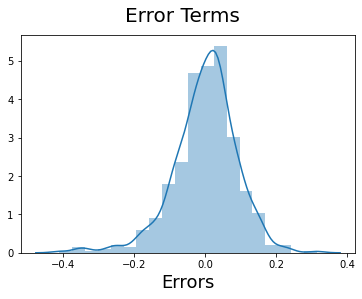

In [405]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

#### Applying the scaling on the test sets

In [406]:
num_vars =  ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [407]:
y_test = df_test.pop('cnt')
X_test = df_test

In [408]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [409]:
# Making predictions
y_pred = lr_6.predict(X_test_new)

In [412]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)


0.7956

## Model Evaluation

Text(0, 0.5, 'y_pred')

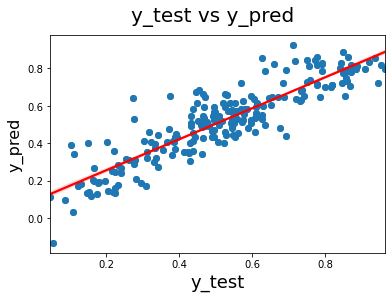

In [415]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [413]:
lr_6.params

const              0.075325
yr                 0.233056
workingday         0.056323
temp               0.549936
windspeed         -0.155238
sep                0.097236
sat                0.067688
light_snow_rain   -0.288021
mist_cloudy       -0.081347
summer             0.087429
winter             0.131826
dtype: float64